In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the training data since we likely won't be doing any "heavy lifting" here

In [2]:
df = pd.read_csv('csv/dataset_en_train.csv')

In [3]:
df.shape

(200000, 4)

In [4]:
df.columns

Index(['stars', 'category', 'title', 'body'], dtype='object')

# Star rating distribution

In [5]:
df['stars'].value_counts()

1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64

A perfectly stratified sample with respect to star values.

I noticed when loading the data that many of the title fields simply report the stars awarded to the product. How prevalent are those?

In [6]:
df['title'].value_counts().head(10)

Three Stars      4169
Four Stars       3932
Five Stars       3918
Two Stars        3730
One Star         3435
Disappointed      683
Great product     437
Good              421
Great             345
Good product      345
Name: title, dtype: int64

The top five most frequent titles are simply a statement of the stars awarded. This doesn't bode well for extracting good information from the titles.

In [7]:
df['title'].value_counts().head(5).sum()/len(df)

0.09592

Nearly ten percent of the whole sample has this sort of title. In one way this is unfortuntate as it might have given us a more parsimonious input (instead of the entire review body or to augment the review body). However, if we can't use the title as-is we don't need to expend time trying to squeeze more out of the title field.

# Product Categories

In [8]:
df['category'].value_counts()

home                        17679
apparel                     15951
wireless                    15717
other                       13418
beauty                      12091
drugstore                   11730
kitchen                     10382
toy                          8745
sports                       8277
automotive                   7506
lawn_and_garden              7327
home_improvement             7136
pet_products                 7082
digital_ebook_purchase       6749
pc                           6401
electronics                  6186
office_product               5521
shoes                        5197
grocery                      4730
book                         3756
baby_product                 3150
furniture                    2984
jewelry                      2747
camera                       2139
industrial_supplies          1994
digital_video_download       1364
luggage                      1328
musical_instruments          1102
video_games                   775
watch         

In [9]:
len(df['category'].value_counts())

31

31 unique product categories.

# Category response data by stars rating
Do some categories have higher/lower star ratings? 

In [10]:
df.groupby('category').describe()

stars                                             
                            count      mean       std  min  25%  50%  75%  max
category                                                                      
apparel                   15951.0  3.015736  1.303216  1.0  2.0  3.0  4.0  5.0
automotive                 7506.0  2.966294  1.440005  1.0  2.0  3.0  4.0  5.0
baby_product               3150.0  3.112063  1.387400  1.0  2.0  3.0  4.0  5.0
beauty                    12091.0  2.902407  1.423449  1.0  2.0  3.0  4.0  5.0
book                       3756.0  3.348775  1.410924  1.0  2.0  3.0  5.0  5.0
camera                     2139.0  3.002338  1.461861  1.0  2.0  3.0  4.0  5.0
digital_ebook_purchase     6749.0  3.666765  1.104335  1.0  3.0  4.0  4.0  5.0
digital_video_download     1364.0  2.851906  1.372106  1.0  2.0  3.0  4.0  5.0
drugstore                 11730.0  2.970503  1.430750  1.0  2.0  3.0  4.0  5.0
electronics                6186.0  2.891044  1.464788  1.0  2.0  3.0  4.0  5.0
furniture                  2984.0  2.960791  1.360869  1.0  2.0  3.0  4.0  5.0
grocery                    4730.0  2.801903  1.456015  1.0  1.0  3.0  4.0  5.0
home                      17679.0  3.047684  1.409542  1.0  2.0  3.0  4.0  5.0
home_improvement           7136.0  3.023122  1.442142  1.0  2.0  3.0  4.0  5.0
industrial_supplies        1994.0  3.000000  1.457889  1.0  2.0  3.0  4.0  5.0
jewelry                    2747.0  2.995996  1.397500  1.0  2.0  3.0  4.0  5.0
kitchen                   10382.0  3.061260  1.440769  1.0  2.0  3.0  4.0  5.0
lawn_and_garden            7327.0  2.866521  1.448895  1.0  2.0  3.0  4.0  5.0
luggage                    1328.0  3.247741  1.351962  1.0  2.0  3.0  4.0  5.0
musical_instruments        1102.0  3.083485  1.431550  1.0  2.0  3.0  4.0  5.0
office_product             5521.0  3.051983  1.444886  1.0  2.0  3.0  4.0  5.0
other                     13418.0  3.024817  1.419546  1.0  2.0  3.0  4.0  5.0
pc                         6401.0  2.904234  1.461394  1.0  2.0  3.0  4.0  5.0
personal_care_appliances     75.0  2.853333  1.503989  1.0  1.5  3.0  4.0  5.0
pet_products               7082.0  2.931799  1.393798  1.0  2.0  3.0  4.0  5.0
shoes                      5197.0  3.091976  1.326002  1.0  2.0  3.0  4.0  5.0
sports                     8277.0  3.118884  1.399571  1.0  2.0  3.0  4.0  5.0
toy                        8745.0  2.971298  1.433402  1.0  2.0  3.0  4.0  5.0
video_games                 775.0  2.781935  1.449471  1.0  1.0  3.0  4.0  5.0
watch                       761.0  2.939553  1.361703  1.0  2.0  3.0  4.0  5.0
wireless                  15717.0  2.726729  1.420662  1.0  1.0  3.0  4.0  5.0

It looks like there's not a lot of variability across categories. Standouts on the high side are **books** and **ebooks**. The latter in particular has a higher mean and lower variance in stars awarded. 

On the low end is **wireless**. The meaning of this category is not immediately apparent, so let's look at a few sample reviews:

In [11]:
df[df['category']=='wireless']['body'].head(20)

3      This product is a piece of shit. Do not buy. D...
12     was not pleased and Bluetooth malfunctioned af...
14     Absolutely horrible. Fingerprints, face prints...
15     Does not play with with the two cases i bought...
20     I had problem with the 2 screen protectors, an...
44      Terrible. Doesn’t even charge waste of my money.
48             Cheap all peeled off in less than a month
60     Not a good product at all. The adhesion is non...
86     This screen protector does not fit. Waste of m...
87     The watch has great features. My only concern ...
89     Terrible product. Had it for a few weeks and d...
97     The product worked for maybe five minutes then...
101    I bought a package of three. Two of them have ...
111    This Case is no good. It looks great in the ad...
113    The product never actually arrived, despite th...
114    Doesnt work well. It's harder to use the scree...
120    First drop and it shattered. Had it on only 24...
143                  Sound is d

It appears to be a catch-all product category for portable speakers, bluetooth accessories, screen protectors, phone cases, smart watches, etc.

# Review body length

In [12]:
df['length'] = df['body'].apply(len)
df.head()

,stars,category,title,body,length
0,1,furniture,I'll spend twice the amount of time boxing up ...,Arrived broken. Manufacturer defect. Two of th...,612
1,1,home_improvement,Not use able,the cabinet dot were all detached from backing...,56
2,1,home,The product is junk.,I received my first order of this product and ...,206
3,1,wireless,Fucking waste of money,This product is a piece of shit. Do not buy. D...,145
4,1,pc,bubble,went through 3 in one day doesn't fit correct ...,91


In [13]:
df['length'].describe()

count    200000.00000
mean        178.84632
std         179.62776
min          15.00000
25%          66.00000
50%         125.00000
75%         228.00000
max        3908.00000
Name: length, dtype: float64

<AxesSubplot:xlabel='length', ylabel='Count'>

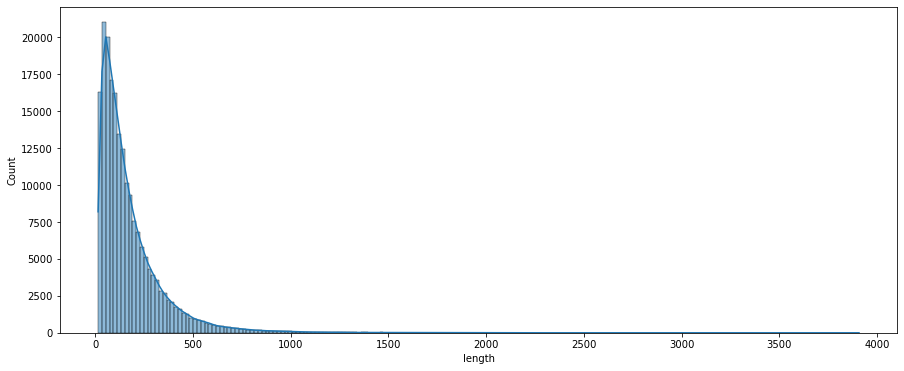

In [14]:
plt.figure(figsize=(15,6))
sns.histplot(x='length', data=df, bins=200, kde=True)

Wow, there must be a few seriously **long** reviews. Are long reviews  mostly positive or mostly negative?

<AxesSubplot:xlabel='stars', ylabel='length'>

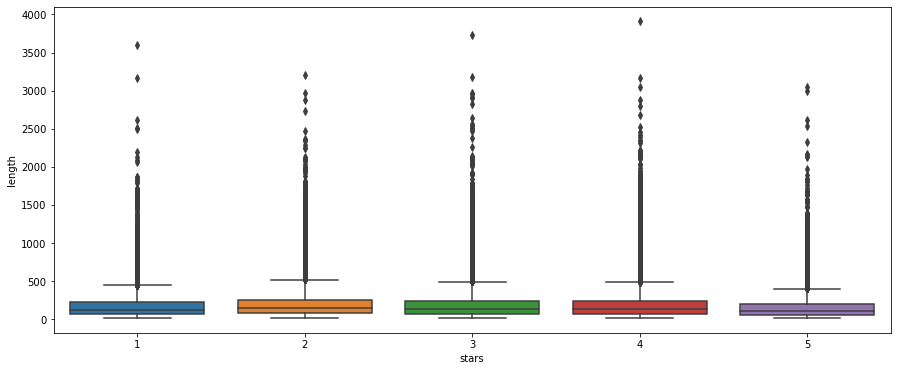

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='stars', y='length', data=df)

A boxplot isn't all that revealing...

The longest review is a four-star review:

In [16]:
df[df['length']==df['length'].max()]

,stars,category,title,body,length
145529,4,baby_product,Roomy and convertible,Pros . A LOT of space. This bag can hold a ton...,3908


Next, let's compare the average rating for the lowest 90% vs the top 10%

In [17]:
df['length'].quantile(q=.9)

377.0

The 90th perccentile length is 377 characters.

In [18]:
top10 = np.where(df['length']>377, 'Top 10', 'Bottom 90')

<AxesSubplot:xlabel='stars', ylabel='Density'>

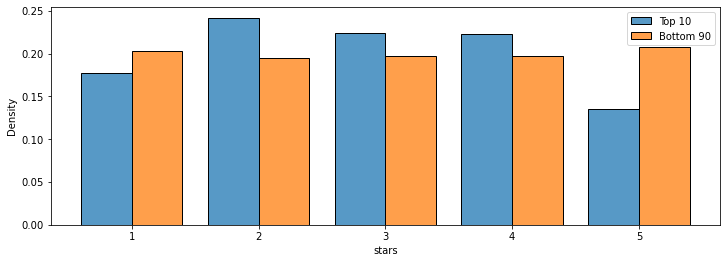

In [19]:
plt.figure(figsize=(12,4))
sns.histplot(x=df['stars'], hue=top10, stat='density', multiple='dodge', common_norm=False, discrete=True, shrink=.8)

There's *potential* evidence that **five-star** reviews tend to be longer; maybe some people who *really* care about the product (and are predisposed to view it favorably) tend to give very in-depth reviews. 

## Transform review body text into vector

Just a bag of words for now; it might be instructive to start looking at 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [24]:
vectorizer.fit(df['body'])

CountVectorizer()

In [31]:
vectorizer.vocabulary_

{'arrived': 3286,
 'broken': 5920,
 'manufacturer': 23073,
 'defect': 10602,
 'two': 39297,
 'of': 25933,
 'the': 37830,
 'legs': 21794,
 'base': 4239,
 'were': 41453,
 'not': 25555,
 'completely': 8549,
 'formed': 15489,
 'so': 34773,
 'there': 37869,
 'was': 41165,
 'no': 25419,
 'way': 41277,
 'to': 38344,
 'insert': 19688,
 'casters': 6949,
 'unpackaged': 39887,
 'entire': 13389,
 'chair': 7214,
 'and': 2762,
 'hardware': 17662,
 'before': 4539,
 'noticing': 25591,
 'this': 37980,
 'll': 22234,
 'spend': 35265,
 'twice': 39264,
 'amount': 2690,
 'time': 38235,
 'boxing': 5610,
 'up': 40109,
 'whole': 41640,
 'useless': 40236,
 'thing': 37943,
 'send': 33207,
 'it': 20251,
 'back': 3891,
 'with': 41885,
 'star': 35778,
 'review': 31575,
 'part': 27049,
 'never': 25225,
 'got': 16796,
 'sit': 34116,
 'in': 19220,
 'will': 41746,
 'go': 16646,
 'far': 14355,
 'as': 3336,
 'include': 19285,
 'picture': 27826,
 'what': 41503,
 'their': 37843,
 'injection': 19586,
 'molding': 24317,
 'qu

In [38]:
vectorizer.token_pattern

'(?u)\\b\\w\\w+\\b'